# Pairs Trading(Statistical Arbitrage) Strategy

References:
- PQN #021: Build a pairs trading strategy with Python.https://pyquantnews.com/build-a-pairs-trading-strategy-python/
- The comprehensive introduction to pairs trading.https://hudsonthames.org/definitive-guide-to-pairs-trading/
- What is mean reversion? https://www.investopedia.com/terms/m/meanreversion.asp
- Cointegration. https://corporatefinanceinstitute.com/resources/data-science/cointegration/
- Alexander C. Cointegration and asset allocation: a new active hedge fund strategy.
- http://stat.wharton.upenn.edu/~steele/Courses/434/434Context/PairsTrading/PairsTradingQFin05.pdf
- Pairs Trading(HKUST) https://palomar.home.ece.ust.hk/MAFS5310_lectures/slides_pairs_trading.pdf
- Detail for Trace test and Maximum Eigenvalue test: The Johansen Tests for Cointegration.http://www.jerrydwyer.com/pdf/Clemson/Cointegration.pdf
- pyfolio tearsheet.https://pyfolio.ml4trading.io/api-reference.html#module-pyfolio.tears

## Definition
- Match a **long** position with a **short** position in two stocks with a `high positive correlation`(co-moving assets) in returns but diverging spread.
  - `Market neutral strategy` need to be taken into consideration, for exploiting an equilibrium between two securities.
  - Usually two companies manufacturing similar products with same supply chain will be impacted by same economic factors.
  - The strategy makes money when the stable relationships *temporarily break down*.Hence, it relies on **cointegrition**. **Stationarity** test is needed.
    - cointegrition: time series with the same trend
  - buy long the underpricing stock and sell short the outperforming security.
- Pick the right pair to trade is important. We usually start with a bundle of stocks with economical relationship.


## Five Approaches to Achieve it
1. Distance Approach
2. Cointegrition Approach(mostly used)
3. Time Series Approach
4. Stochastic Control Approach
5. Others: 
  - Copula
  - PCA
  - Machine Learning

## Cointegrition: $I(d) Series$协整
- integrated series of order $d$
- if two series are cointegrited, their ratios will very around the mean.
- $I(1)$ series: Price, Yield, Exchange Rate
- $I(0)$ series: returns
  - can be obtained by `differencing` I(1) series.
  - Expression: $x_t$ and $y_t$ are integrated, if they are $I(1)$ series and there exists $z_t=x_t-\beta y_t$(linear combination) is $I(0)$ series.
    - $\beta$: the ratio of long leg to the short leg, called conintegrition coefficient. 
      - how to find $\beta$?
        - **Engle-Granger test**: 
          - a *linear regression* with asset prices to test whether the residual is stationary
          - apply *ADF unit-root test* to regression residual.
          - Hypothesis: 
            - $H_0$: the residuals have a unit root and are integrated
            - $H_1$: residuals are stationary and the series are cointegrated.
          - suitable for <u>a pair</u> of assets
          - Drawback: which asset to choose as the dependent variable
        - **Johansen Tests** 
          - Vector Error Correction Model(VECM), long run
            - $Δy_t=c+Πy_{t-1}+ΓΔy_{t-1}+...+ΓΔy_{t-p}+ϵ_t$
              - where, $Γ_i=Π_1+Π_2+...+Π_i-I$
              - $Π=αβ'$, where α matrix adjustment parameter, β conintegrating vector
          - Two mean forms:
            1. Trace tests
            2. Maximum Eigenvalue test
              - likelihood ratio test
          - suitable for >= 2 assets
          - a preferred method to test
          - drawback: only suitable for large datasets, a small sample size produce unreliable results.
  - weak-sense stationary: 
    - mean function is finite and time-invariant. 
      - 🌟the basis of `mean reversing trading strategy`均值回归: asset price volatility and historical returns eventually will <u>revert to the long-run mean level</u> of the entire dataset.
    - variance function is finite and time-invariant.
    - covariance functions only depend on time lag
- Cointegrition is a measure of <u>similarity</u> of assets in terms of `risk exposure` profiles.
- it describes the `long-term relationship` between <u>asset prices</u>, while `correlation` is the short term relationship between `returns`.
- How to find Cointegrated asset pair?
  - Simulation
    - other area applications:Option pricing, Monte Carlo backtesting
    - Methods: Stationary AR(1) process
      - if a time series is stationary->$I(0)$ series
      - $a_t=Φ a_{t-1} +ϵ_t$, where $ϵ_t \sim N(0,\sigma^2)$
    - Two components belongs to $I(0)$ series
      - returns of one asset
      - **spread** of the cointegrated pairs(ie: the difference between their prices)
        - once spread widen, transcation begins.


## Three Steps to Build Pairs Trading Strategy
1. Pairs selection: identifying co-moving securities
  - Cointegration test, distance metrics
2. Spread Modeling: 
  - maximize the mean-reversion
  - keep market neutrality
3. Trading Rules Configuration

#### Optimizing
1. Mean reverting: `spread` between the cointegrated assets.
2. Factors need to be taken into consideration:
  - Trade Location: determine the minimum PnL per trade
    - profit per trade: $P=N(X_o-X_c)+\beta N(Y_c-Y_o)=N(X_o-\beta Y_o)- N(X_c-\beta Y_c)=Nϵ_{t_o}-Nϵ_{t_c}≥NU$
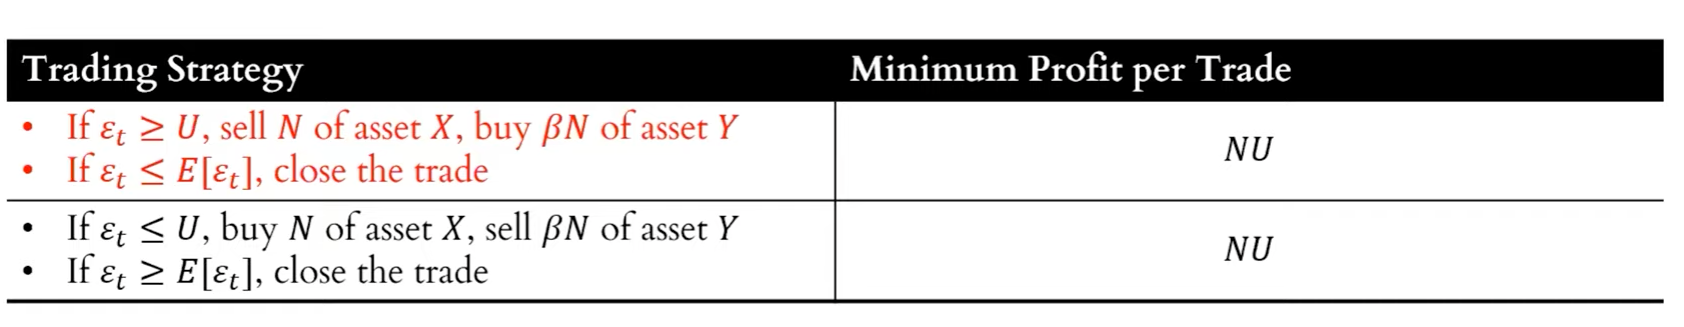
  - Trade Frequency: determine the numbers of trades
    - Mean first-Passage Time of AR(1) process to optimzie the trade duration and inter-trade interval.
3. Optimize Target: **Trade location* Trade Frequency** ->optimize the total profit
  - Rule: Tighter bounds, smaller minimum profit per trade, high trade frequency


- Trade duration: the mean-first passage time of $ϵ_t$ to pass the mean $E[ϵ_t]$, if the starting point is at $U$
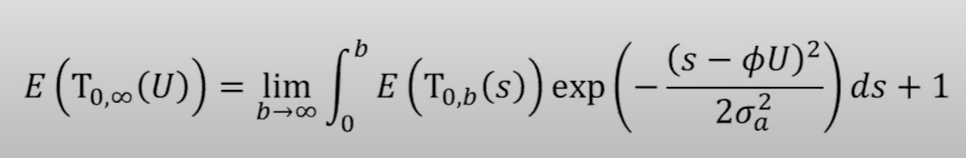
- Inter-trade interval: the mean-first passage time of $ϵ_t$ to pass the $U$, if the starting point is at the mean $E[ϵ_t]$
  - For easiler calculation, we sometimes zero the mean.
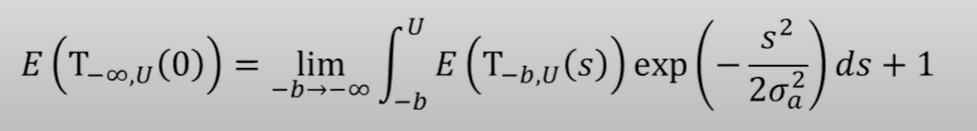
- Where $U$ is upper boundary.


- We can take in-sample and out-of-sample tests of trading strategy.

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.6 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-

In [2]:
!pip install empyrical

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39776 sha256=8e03d8e8c88b3028c635372d974d05204f96c69148471c5e20574181f8a4691c
  Stored in directory: /root/.cache/pip/wheels/67/23/d1/a4ef8ff88dc9af7b0eeb1b6fd0d90c6057eaad5a2df25f4e3f
Successfully built empyrical


In [3]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller,coint
import yfinance as yf
import scipy.optimize as spop
import math
from empyrical import max_drawdown, alpha_beta, annual_volatility, sharpe_ratio, sortino_ratio

In [4]:
#variable specify
stock=['META','AMZN','AAPL','INTC','MSFT','GOOG','NFLX','IBM','EBAY','QCOM','AMD','ORCL','ADBE','HPQ','SAP','NVDA','GRPN','DELL','CSCO']
SD='2017-01-01'
ED='2022-12-31'

In [5]:
#download the dataset
price=yf.download(stock, start=SD, end=ED, progress=False)

In [6]:
#we only keep adj_close price is enough
price=price['Adj Close']

In [7]:
price.head()

,AAPL,ADBE,AMD,AMZN,CSCO,DELL,EBAY,GOOG,GRPN,HPQ,IBM,INTC,META,MSFT,NFLX,NVDA,ORCL,QCOM,SAP
Date,,,,,,,,,,,,,,,,,,,
2017-01-03,27.133324,103.480003,11.43,37.683498,25.142370,14.826542,27.971764,39.306999,70.000000,12.282249,119.605804,30.613661,116.860001,57.501343,127.489998,25.142950,34.932507,54.375088,77.990288
2017-01-04,27.102959,104.139999,11.43,37.859001,24.992918,14.943373,27.896770,39.345001,70.199997,12.472480,121.086678,30.454739,118.690002,57.244068,129.410004,25.729559,35.104687,54.433304,78.315628
2017-01-05,27.240784,105.910004,11.24,39.022499,25.051035,15.016731,28.131121,39.701000,73.199997,12.464211,120.686043,30.404547,120.669998,57.244068,131.809998,25.076401,35.014061,54.499809,79.391037
2017-01-06,27.544476,108.300003,11.32,39.799500,25.100853,15.429710,29.106005,40.307499,70.599998,12.406314,121.279846,30.513288,123.410004,57.740238,131.070007,25.411606,34.841900,54.483177,79.951340
2017-01-09,27.796764,108.570000,11.49,39.846001,25.059336,15.348201,28.824791,40.332500,70.400002,12.141644,119.934906,30.622028,124.900002,57.556484,130.949997,26.441872,35.367474,54.582958,80.755638


In [8]:
#define a function to find the cointegrated pairs
def find_cointegrated_pairs(data):
  n=data.shape[1]
  score_matrix=np.zeros((n,n))
  pvalue_matrix=np.ones((n,n))
  keys=data.keys()
  pairs=[]
  for i in range(n):
    for j in range(i+1, n):
      S1 = data[keys[i]]
      S2 = data[keys[j]]
      result = coint(S1, S2)
      score = result[0]
      pvalue = result[1]
      score_matrix[i, j] = score
      pvalue_matrix[i, j] = pvalue
      if pvalue < 0.05:
        pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [9]:
#apply the function
scores, pvalues, pairs = find_cointegrated_pairs(price)

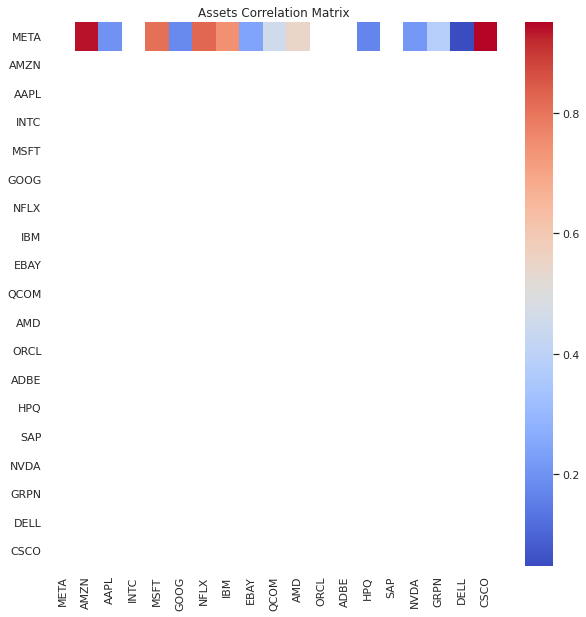

[('AAPL', 'QCOM')]


In [70]:
#visualization with heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pvalues, xticklabels=stock, yticklabels=stock, cmap='coolwarm', mask=(pvalues >= 0.95)) #only get significant pairs
ax.set_title('Assets Correlation Matrix')
plt.show()
print(pairs)

- AAPL and QCOM are conintegrated after the test.

0.04811555488002364


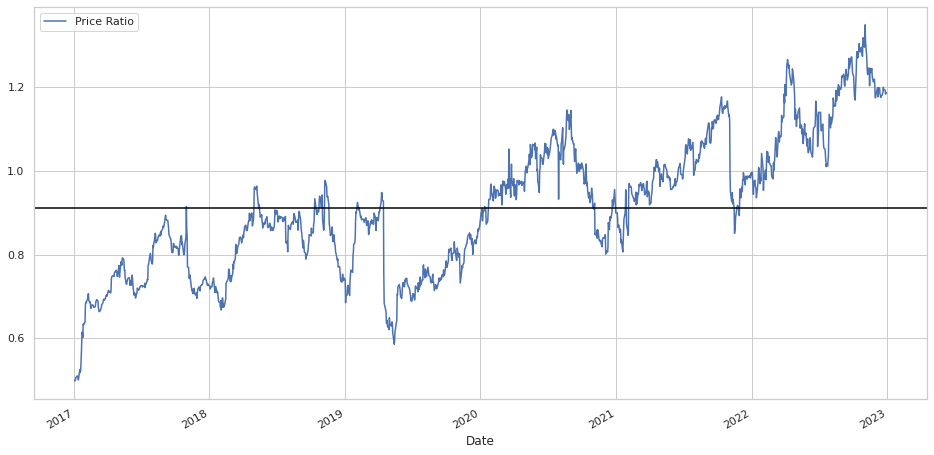

In [11]:
S1=price['AAPL']
S2=price['QCOM']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
#examine the ration between the two time series
ratios = S1 / S2
ratios.plot(figsize=(16,8))
plt.axhline(ratios.mean(),color='black')
plt.legend(['Price Ratio'])
plt.show()

- The Ratio $S1/S2$ moves around it's mean value 
- p-value< 0.05,which means AAPL and QCOM are indeed cointegrated pairs.
- We make money when the ratio reverting to the mean
  - Long: when $S1/S2$ < usual with an increasing expectation→buy S1 sell S2
    - make money if security gains value
  - Short: when $S1/S2$ > usual with an decreasing expectation→sell S1 buy S2
    - make money if security loses value

In [12]:
#Normalize the signal using z-score for analyzing the trend properly
#define the zscore function
def z_score(series):
  return (series-series.mean())/np.std(series)

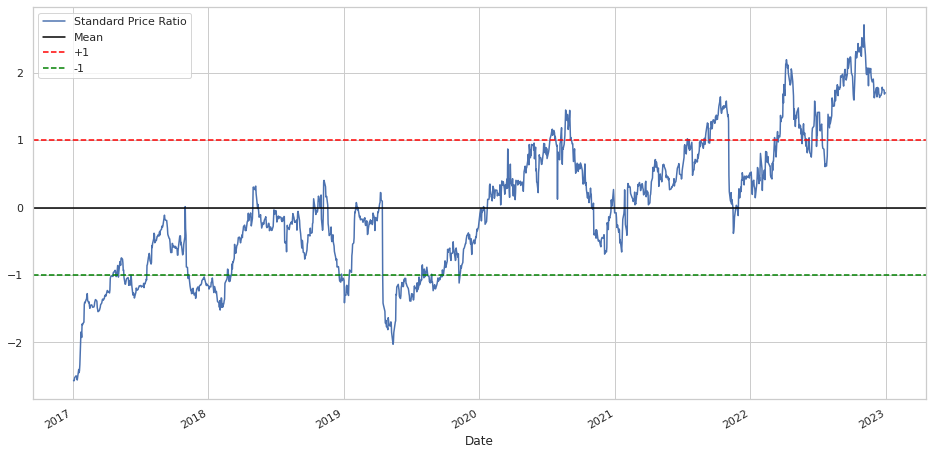

In [13]:
#plot the zscore price ratio
z_score(ratios).plot(figsize=(16,8))
plt.axhline(z_score(ratios).mean(),color='black')
#give the boundary
plt.axhline(1.0, color='red',linestyle='--')
plt.axhline(-1.0, color='green',linestyle='--')
plt.legend(['Standard Price Ratio','Mean', '+1', '-1'])
plt.show()

- Compared the last graph, this normalized ratio curve moves around mean more observsely.
- but sometimes there exists large divergence from the mean, which we can make money from.
  - 

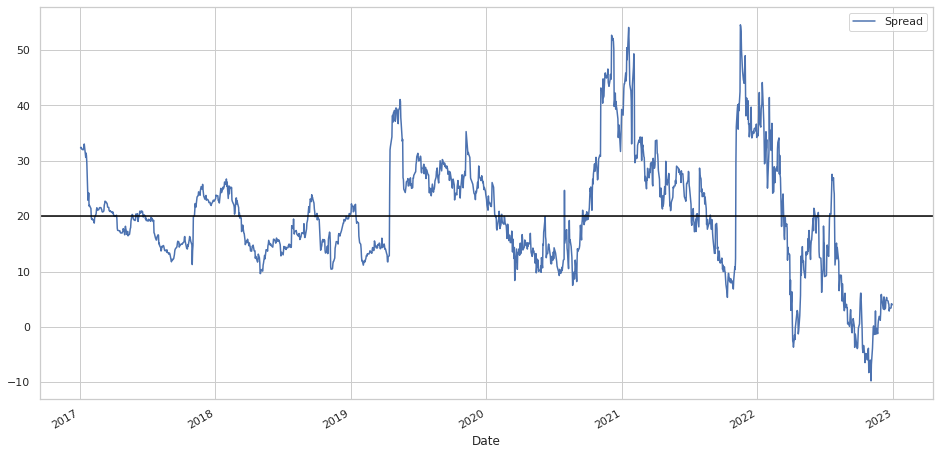

In [14]:
#spread analysis: EG method
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['AAPL']
b = results.params['AAPL']
spread = S2 - b * S1 #b is hedgeing ratio
spread.plot(figsize=(16,8))
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread'])

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   QCOM   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 2.206e+04
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:58:12   Log-Likelihood:                -5655.7
No. Observations:                1510   AIC:                         1.132e+04
Df Residuals:                    1508   BIC:                         1.133e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0833      0.541     37.106      0.000      19.022      21.145
AAPL           0.8116      0.005    148.532      0.000       0.801       0.822
==============================================================================
Omnibus:                       49.874   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.078
Skew:                           0.345   Prob(JB):                     2.72e-15
Kurtosis:                       3.768   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Spread
- Calculation method1: $Spread=log(S1)-\beta log(S2)-\alpha$
  - $S1$ and $S2$: stock price
  - $beta$: hedge ratio, a constant
    - Hedge ratio: the amount of S2 to purchase or sell for every unit of S1.
    - A short sale makes money if the security sold loses value
    - A long purchase will make money if a security gains value
- Calculation method2: $Spread = Closing S1 – closing S2$
- Trading Strategy: 
  - Long: when the spread is **small** and we expect it to <u>become larger</u>.
    - longing Y and shorting X
  - Short: when the spread is **large** and we expect it to <u>become smaller</u>.
    - shorting Y and longing X

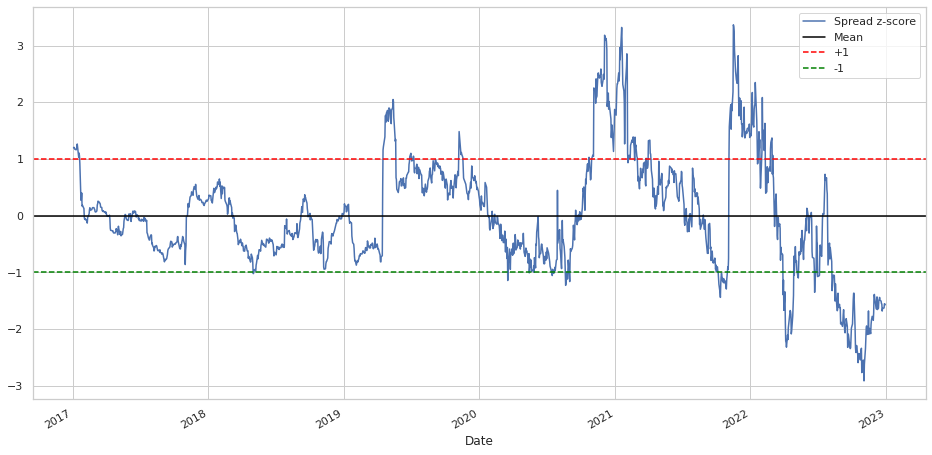

In [15]:
#normalize the spread with z-score
z_score(spread).plot(figsize=(16,8))
plt.axhline(z_score(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

- **Long**: the spread whenever the z-score < -1.0
- **Short**: the spread when the z-score is above 1.0
- **Exit**: when the z-score approaches zero

In [16]:
#check the stationarity use ADF test
adf = sm.tsa.stattools.adfuller(spread, maxlag=1)
print('ADF test statistic: %.02f' % adf[0])
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))
print('p-value: %.03f' % adf[1])

ADF test statistic: -3.73
	1%: -3.435
	5%: -2.863
	10%: -2.568
p-value: 0.004


- The test statistic is -3.73. The more negative this statistic, the more likely we are to reject the null hypothesis.
- The p-values suggests that we can <u>reject the null hypothesis</u> with a significance level of less than 5%. That means the time series is **stationary**.

In [17]:
#Johansen Test with VECM
#H0:no cointegration
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [32]:
df = pd.DataFrame({'S1':price['AAPL'],'S2':price['QCOM']})
result=coint_johansen(endog=df,det_order=0,k_ar_diff=1)

In [33]:
#get the Maximum Eigenvalue
result.max_eig_stat

array([17.72943451,  1.15313754])

In [35]:
#get the Maximum Eigenvalue critical value at 90%,95%,99%
result.max_eig_stat_crit_vals

array([[12.2971, 14.2639, 18.52  ],
       [ 2.7055,  3.8415,  6.6349]])

In [36]:
#get the trace statistics
result.trace_stat

array([18.88257205,  1.15313754])

In [34]:
#Critical values (90%, 95%, 99%) of trace statistic
result.trace_stat_crit_vals

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

- references:https://www.statsmodels.org/dev/generated/statsmodels.tsa.vector_ar.vecm.coint_johansen.html
- `.tsa.vector_ar.vecm.coint_johansen(endog, det_order, k_ar_diff)`
  - `endog`: data to test
  - `det_order`: 0: constant term, -1: no deterministic terms, 1: linear trend
  - `k_ar_diff`: Number of lagged differences in the model.
- From the result above, using trace statistics and maximum eigenvalue methods, we have enough evidence to reject $H_0$

#### Set up Trading Rules
$Y=1, Buy$, when the z-score is below -1 

$Y=-1,Sell$, when the z-score is over 1

- Prediction model: $Y_t=sign(Ratio_{t+1}-Ratio_t)$

In [19]:
#train/test split 70%/30%
print(len(ratios))

1510


In [20]:
train=ratios[:1056]
test=ratios[1056:]

- Know the information about the `direction` of ratio moves
- The ratios always eventually <u>revert back to the mean</u>

In this case, we use MA(5) and MA(20) of weekly and monthly ratios, STD(20), and Z-score to viusalize the features.

In [21]:
MA5=train.rolling(window=5, center=False).mean()
MA20=train.rolling(window=20, center=False).mean()
STD20=train.rolling(window=20,center=False).std()
zscore20_5 = (MA5 - MA20)/STD20

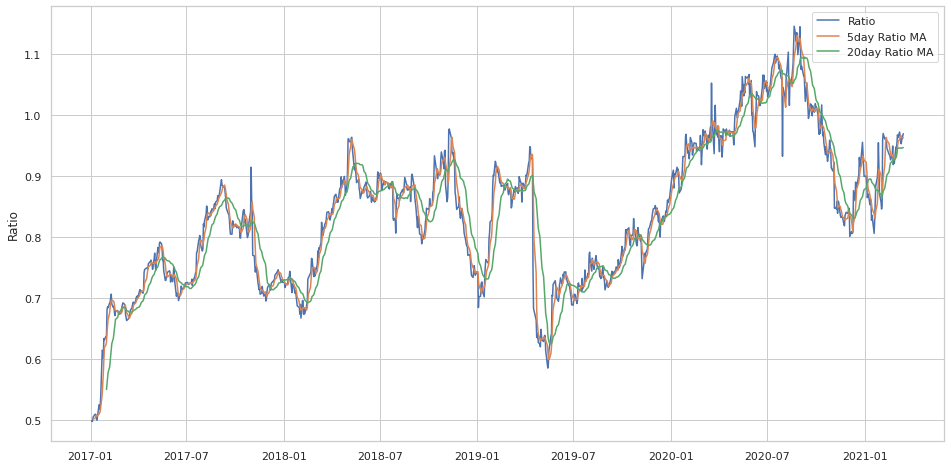

In [22]:
plt.figure(figsize=(16,8))
plt.plot(train.index, train.values)
plt.plot(MA5.index, MA5.values)
plt.plot(MA20.index, MA20.values)
plt.legend(['Ratio','5day Ratio MA', '20day Ratio MA'])
plt.ylabel('Ratio')
plt.show()

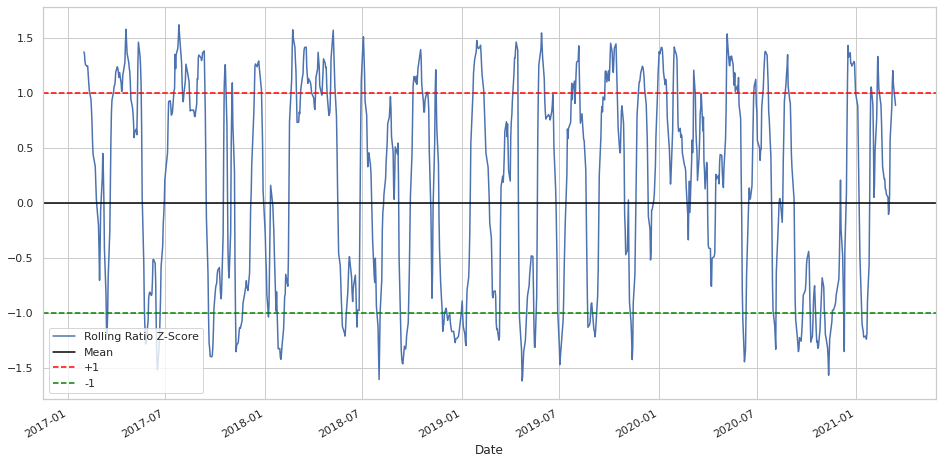

In [23]:
plt.figure(figsize=(16,8))
zscore20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio Z-Score', 'Mean', '+1', '-1'])
plt.show()

#### Train, Validate
- We use the **test dataset** to ensure trading signal generation
- Backtesting is using out of sample dataset

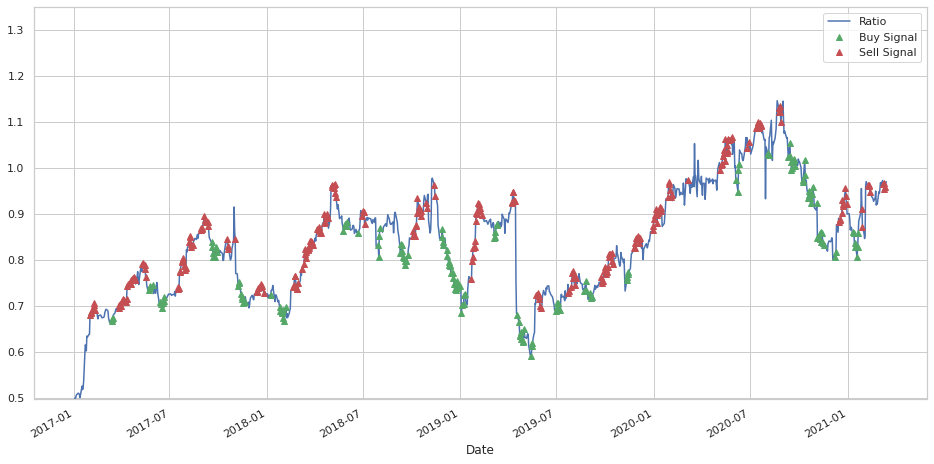

In [24]:
#trading signals on actual ratios 
plt.figure(figsize=(16,8))
train.plot()
buy = train.copy()
sell = train.copy()
buy[zscore20_5>-1] = 0
sell[zscore20_5<1] = 0
buy[20:].plot(color='g', linestyle='None', marker='^')
sell[20:].plot(color="r", linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

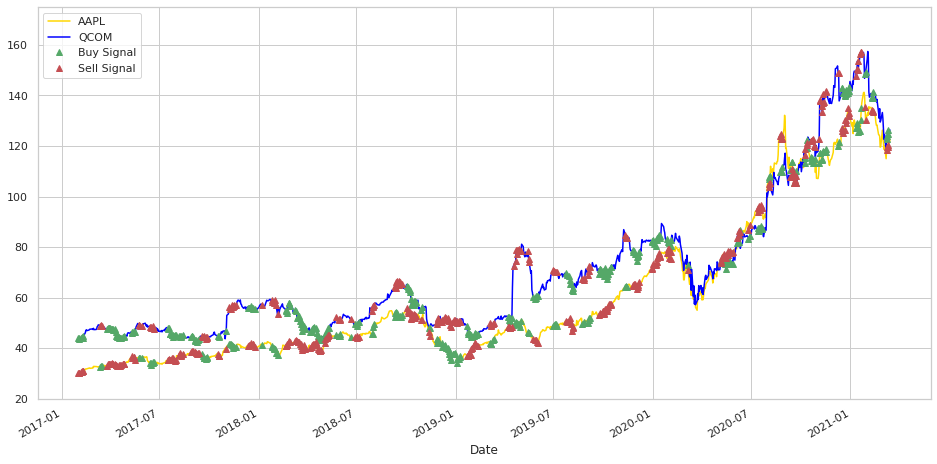

In [62]:
#trading signals in actual stock prices with training dataset

plt.figure(figsize=(16,8))
S1 = price['AAPL'].iloc[:1056]
S2 = price['QCOM'].iloc[:1056]
#avoid the NaN numbers, so we start from day21
S1[20:].plot(color='gold')
S2[20:].plot(color='blue')
#define buy the ratio and sell the ratio
buyRatio = 0*S1.copy()
sellRatio = 0*S1.copy()
# When we buy the ratio, we buy stock S1 and sell S2
buyRatio[buy!=0] = S1[buy!=0]
sellRatio[buy!=0] = S2[buy!=0]
# When we sell the ratio, we sell stock S1 and buy S2
buyRatio[sell!=0] = S2[sell!=0]
sellRatio[sell!=0] = S1[sell!=0]
#plotting
buyRatio[20:].plot(color='g', linestyle='None', marker='^')
sellRatio[20:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.ylim(20, 175)
plt.legend(['AAPL', 'QCOM', 'Buy Signal', 'Sell Signal'])
plt.show()

In [40]:
#check the profits generated from the strategy, calculate the PnL
def PairsTrading(S1, S2, window1, window2):
  #special cases, if both window=0, exit
  if (window1 == 0) or (window2 == 0):
    return 0
  #get the rolling means and rolling std with ratio
  ratios = S1/S2
  MA1 = ratios.rolling(window=window1,center=False).mean()
  MA2 = ratios.rolling(window=window2,center=False).mean()
  STD = ratios.rolling(window=window2,center=False).std()
  ZScore = (MA1 - MA2)/STD
  #simulation
  #starting point with 0 money and no positions
  money = 0
  countS1 = 0
  countS2 = 0
  for i in range(len(ratios)):
    if ZScore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
    elif ZScore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
    elif abs(ZScore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
  return money

In [56]:
#apply the function with training dataset
PairsTrading(price['AAPL'].iloc[:1056], price['QCOM'].iloc[:1056], 5, 121)

Exit pos 0.0 0.7167036643857884 0 0
Exit pos 0.0 0.7208325835185403 0 0
Exit pos 0.0 0.7218579188983936 0 0
Exit pos 0.0 0.7251606825113635 0 0
Exit pos 0.0 0.7250339739120462 0 0
Exit pos 0.0 0.7259656488702821 0 0
Exit pos 0.0 0.722377488859524 0 0
Exit pos 0.0 0.7241789721942276 0 0
Exit pos 0.0 0.7241346640230703 0 0
Exit pos 0.0 0.7247569818273957 0 0
Exit pos 0.0 0.7311791837493445 0 0
Exit pos 0.0 0.7208989900130642 0 0
Exit pos 0.0 0.7305502823514607 0 0
Exit pos 0.0 0.729306250168869 0 0
Exit pos 0.0 0.7363875374681904 0 0
Exit pos 0.0 0.7411793757305456 0 0
Exit pos 0.0 0.7393858330001734 0 0
Selling Ratio 0.0 0.7758878641723552 -1 0.7758878641723552
Selling Ratio 0.0 0.7944338005735172 -2 1.5703216647458724
Selling Ratio 0.0 0.7970802813620183 -3 2.367401946107891
Selling Ratio 0.0 0.8027967340066798 -4 3.1701986801145705
Selling Ratio 0.0 0.7973793865196925 -5 3.967578066634263
Selling Ratio 0.0 0.7859263585420367 -6 4.7535044251763
Selling Ratio 0.0 0.7773211194702195 -7 5

1356.08555901007

- After the multiple experiments manually, we find that we can get maximum profits when rolling window2=121 days(nearly half year period)

In [61]:
#backtesting with test data
PairsTrading(price['AAPL'].iloc[1056:], price['QCOM'].iloc[1056:],5,121)

Selling Ratio 0.0 1.0910893643283948 -1 1.0910893643283948
Selling Ratio 0.0 1.1147723245556203 -2 2.2058616888840152
Selling Ratio -2.842170943040401e-14 1.1130554704090623 -3 3.3189171592930773
Selling Ratio -2.842170943040401e-14 1.1129327602855277 -4 4.431849919578605
Selling Ratio 0.0 1.0677965634167579 -5 5.499646482995363
Selling Ratio 2.842170943040401e-14 1.066497401246317 -6 6.56614388424168
Selling Ratio 2.842170943040401e-14 1.0732881401607028 -7 7.6394320244023834
Selling Ratio 2.842170943040401e-14 1.1025359420258496 -8 8.741967966428232
Selling Ratio 2.842170943040401e-14 1.0994878128626446 -9 9.841455779290877
Selling Ratio 2.842170943040401e-14 1.1180919773110425 -10 10.95954775660192
Selling Ratio 2.842170943040401e-14 1.1011319854396844 -11 12.060679742041604
Selling Ratio 2.842170943040401e-14 1.1133764281812513 -12 13.174056170222855
Selling Ratio 2.842170943040401e-14 1.1214372597553373 -13 14.295493429978192
Selling Ratio 2.842170943040401e-14 1.1213844073712198 

1981.0730212769583

#### Optimization and Evaluation

In [63]:
!pip install pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.7 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88682 sha256=85e24d5bc51d926ef0f50317eac0380baead786e1dc0317d56c5d31052675d20
  Stored in directory: /root/.cache/pip/wheels/75/c7/b9/986a1ba8adb2afce230e1a497dc11aeb33efef4fc8dfd6c649
Successfully built pyfolio


In [65]:
import pandas_datareader.data as web
import pyfolio as pf

/usr/local/lib/python3.9/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [67]:
!pip install pykalman
import pykalman
from pykalman import KalmanFilter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 KB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48463 sha256=c7c81261aee29eac8262292ed314af191254b1b30c9039558deb762e77861d3d
  Stored in directory: /root/.cache/pip/wheels/7a/68/21/675239322d2bb2e8e1fa317d4bd7b5566a4e82780b25a27f7a
Successfully built pykalman


In [68]:
def KalmanFilterAverage(x):
  # Construct a Kalman filter
    kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = 0,
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=0.01)
  # Use the observed values of the price to get a rolling mean
    state_means, _ = kf.filter(x.values)
    state_means = pd.Series(state_means.flatten(), index=x.index)
    return state_means

# Kalman filter regression
def KalmanFilterRegression(x,y):
    delta = 1e-3
    trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
    obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)
    kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
    initial_state_mean=[0,0],
    initial_state_covariance=np.ones((2, 2)),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat,
    observation_covariance=2,
    transition_covariance=trans_cov)
    # Use the observations y to get running estimates and errors for the state parameters
    state_means, state_covs = kf.filter(y.values)
    return state_means

def half_life(spread):
    spread_lag = spread.shift(1)
    spread_lag.iloc[0] = spread_lag.iloc[1]
    spread_ret = spread - spread_lag
    spread_ret.iloc[0] = spread_ret.iloc[1]
    spread_lag2 = sm.add_constant(spread_lag)
    model = sm.OLS(spread_ret,spread_lag2)
    res = model.fit()
    halflife = int(round(-np.log(2) / res.params[1],0))
    if halflife <= 0:
        halflife = 1
    return halflife